In [2]:
import pandas as pd
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
from prob3 import *
from scipy.stats import mode
import matplotlib.pyplot as plt

In [4]:
res = pd.read_pickle("../results/prob3_mcmc_ara.pkl")

In [5]:
p_d = res["p_a"]

In [6]:
## Main APS loop

In [7]:
def propose(x_given, x_values):
    if x_given == x_values[0]:
        return( np.random.choice([x_values[1], x_values[-1]],
        p=[0.5, 0.5]) )

    if x_given == x_values[-1]:
        return( np.random.choice([x_values[0], x_values[-2]],
        p=[0.5, 0.5]) )

    idx = list(x_values).index(x_given)
    return( np.random.choice([x_values[idx+1], x_values[idx-1]],
    p=[0.5, 0.5]) )


In [251]:
N_aps = 10000000
burnin = 0.20
##
d_sim = np.zeros(N_aps, dtype = int)
d_sim[0] = np.random.choice(d_values)
a_sim = np.random.choice(a_values, p=p_d.loc[d_sim[0]])
theta_sim = prob(d_sim[0], a_sim)

In [252]:
for i in range(1,N_aps):
    ## Update d
    d_tilde = propose(d_sim[i-1], d_values)
    a_tilde = np.random.choice(a_values, p=p_d.loc[d_tilde])
    theta_tilde = prob(d_tilde, a_tilde)

    num = d_util(d_tilde, theta_tilde)

    den = d_util(d_sim[i-1], theta_sim)


    if np.random.uniform() <= num/den:
        d_sim[i] = d_tilde
        a_sim = a_tilde
        theta_sim = theta_tilde
    else:
        d_sim[i] = d_sim[i-1]


d_dist = d_sim[int(burnin*N_aps):]
#return(mode(d_dist)[0], p_d, d_dist)


In [372]:
df_ddist = pd.read_csv("../results/dist.csv")

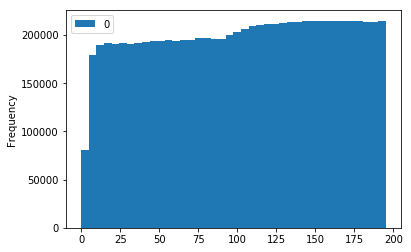

In [373]:
# df_ddist = pd.DataFrame(d_dist)
df_ddist.plot.hist( bins = len(d_values) )
plt.show()